## Regression dengan KNN (K Nearest Neighbours)
* KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dnegan sejumlah tetangga terdekat.
* Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

In [3]:
import pandas as pd

sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'jk' : ['pria', 'pria', 'pria', 'pria', 'wanita',  'wanita',  'wanita',  'wanita',  'wanita'],
     'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,jk,berat
0,158,pria,64
1,170,pria,86
2,183,pria,84
3,191,pria,80
4,155,wanita,49
5,163,wanita,59
6,180,wanita,67
7,158,wanita,54
8,178,wanita,67


* Dalam kasus ini, akan diprediksi berat badan berdasarkan jenis kelamin dan tinggi badan.

* tinggi badan dan jenis kelamin berperan sebagai features sedangkan berat badan sebagai target.

## Regression KKN

### Features & Target

In [4]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_train : \n {X_train} \n')
print(f'y_train : {y_train} ')

X_train : 
 [[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']] 

y_train : [64 86 84 80 49 59 67 54 67] 


* Karena dalam kasus ini yang diprediksi adalah nilai kontinus bukan kategori maka digunakan regression task
* pastikan nilai feature bertipe data numerik

### Preprocess Dataset: Konversi Label menjadi Numerik Biner

In [5]:
X_train_transposed = np.transpose(X_train)
print(f'X_train : \n {X_train} \n')
print(f'X_train_transposed : \n {X_train_transposed}')

X_train : 
 [[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']] 

X_train_transposed : 
 [[158 170 183 191 155 163 180 158 178]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk_binarised = lb.fit_transform(X_train_transposed[1])

print(f' jk : {X_train_transposed[1]} \n')
print(f' jk_binarised : \n {jk_binarised}')

 jk : ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita'] 

 jk_binarised : 
 [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
# mengkonversi multi dimensi menjadi array dimensi tunggal
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed : \n {X_train_transposed}')
print(f'X_train : \n {X_train} \n')

X_train_transposed : 
 [[158 170 183 191 155 163 180 158 178]
 [0 0 0 0 1 1 1 1 1]]
X_train : 
 [[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [178 1]] 



* 0 merepresentasikan pria.
* 1 merepresentasikan wanita.
* X_train dan y_train telah siap untuk training model

## Training KNN Regression Model

In [13]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Prediksi Berat Badan

In [14]:
X_new = np.array([[155, 1]])
X_new

array([[155,   1]])

In [16]:
y_pred = model.predict(X_new)
y_pred

array([55.66666667])

## Evaluasi KNN Regression Model

In [17]:
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

print(f'X_test : \n {X_test} \n')
print(f'y_test : {y_test} ')

X_test : 
 [[168   0]
 [180   0]
 [160   1]
 [169   1]] 

y_test : [65 96 52 67] 


In [18]:
y_pred = model.predict(X_test)
y_pred

array([69.66666667, 72.66666667, 59.        , 70.66666667])

### Coefficient of Determination atau R^2

In [19]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.39200515796260493


### Mean Absolute Error (MAE) atau Mean Absolute Deviation (MAD
MAE adalah rata-rata dari nilai absolute error prediksi.
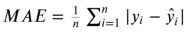

In [20]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

MAE: 9.666666666666668


semakin kecil nilai MAE akan mengindikasikan model yang semakin baik

### Mean Squared Error (MSE) atau Mean Squared Deviation (MSD)
MSE adalah rata-rata dari error kuadrat dari prediksi
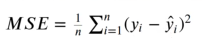

In [21]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print(f'MSE: {MSE}')

MSE: 157.16666666666663


semakin kecil nilai MSE akan mengindikasikan model yang semakin baik

## Permasalahan Scalling pada Features

In [22]:
from scipy.spatial.distance import euclidean

# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_new = np.array([[1640, 0]])

[euclidean(X_new[0], d) for d in X_train]

[60.0, 40.01249804748511]

* data point yang baru lebih dekat dengan data point kedua

In [26]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_new = np.array([[1.64, 0]])

[euclidean(X_new[0], d) for d in X_train]

[0.06000000000000005, 1.0007996802557444]

* data point yang baru lebih dekat dengan data point pertama

## Menerapkan Standard Scaler (Standard Score atau Z-score)
Standardisasi
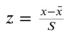

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [32]:
# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_train_scaled =ss.fit_transform(X_train)
print(f'X_train_scaled: \n {X_train_scaled}')

X_new = np.array([[1640, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

X_train_scaled: 
 [[ 1. -1.]
 [-1.  1.]]
X_new_scaled: [[-0.2 -1. ]]

jarak: [1.2, 2.154065922853802]


In [33]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_train_scaled =ss.fit_transform(X_train)
print(f'X_train_scaled: \n {X_train_scaled}')

X_new = np.array([[1.64, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

jarak = [euclidean(X_new_scaled[0], d) for d in X_train_scaled]
print(f'jarak: {jarak}')

X_train_scaled: 
 [[ 1. -1.]
 [-1.  1.]]
X_new_scaled: [[-0.2 -1. ]]

jarak: [1.2000000000000026, 2.1540659228538006]


## Menerapkan Features Scalling pada KNN

### Dataset

In [43]:
# Training Set
X_train = np.array([[158, 0], [170, 0], [183, 0], [191, 0], [155, 1], [163, 1], 
                   [180, 1], [158, 1], [170, 1]])

y_train = np.array([64, 86, 84, 80, 49, 59, 67, 54, 67])

# Test Set
X_test = np.array([[168, 0], [180, 0], [160, 1], [169, 1]])
y_test = np.array([65, 96, 52, 67])

### Features Scalling (Standard Scaler)

In [37]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f'X_train_scaled: \n {X_train_scaled}')
print(f'X_test_scaled: \n {X_test_scaled}')

X_train_scaled: 
 [[-0.9908706  -1.11803399]
 [ 0.01869567 -1.11803399]
 [ 1.11239246 -1.11803399]
 [ 1.78543664 -1.11803399]
 [-1.24326216  0.89442719]
 [-0.57021798  0.89442719]
 [ 0.86000089  0.89442719]
 [-0.9908706   0.89442719]
 [ 0.01869567  0.89442719]]
X_test_scaled: 
 [[-0.14956537 -1.11803399]
 [ 0.86000089 -1.11803399]
 [-0.82260955  0.89442719]
 [-0.06543485  0.89442719]]


### Training dan Evaluasi Model

In [44]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')

MAE: 7.583333333333336
MSE: 85.13888888888893
